In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
sea.set_style("whitegrid")

In [2]:
dataset=pd.read_csv("reallifedata.csv")

In [3]:
dataset

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [4]:
#Dealing with missing values
dataset.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
#Check if null values are available
dataset.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
#Remove null values from rows
data_no_null=dataset.dropna(axis=0)
data_no_null.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [7]:
#Remove column which is less relivent to dependent and independent variables 
data_no_null=data_no_null.drop(['Model'],axis=1)
data_no_null

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


/home/avanti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


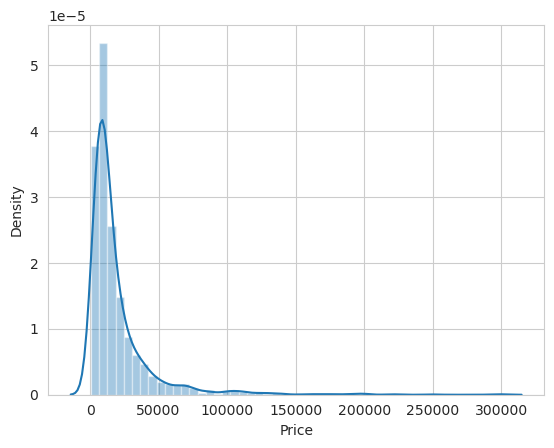

In [11]:
#Normality and Outliers
#Use distplot on dependent variables
sea.distplot(data_no_null['Price'])
plt.show()
#Exponential

In [15]:
#Remove Outliers
q = data_no_null['Price'].quantile(0.99)

In [16]:
data1 = data_no_null[data_no_null['Price']<q]

/home/avanti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


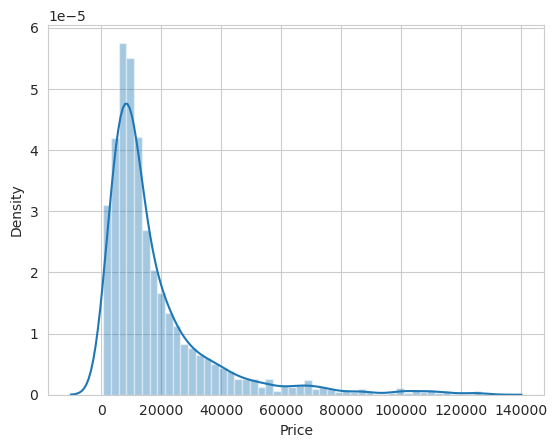

In [17]:
sea.distplot(data1['Price'])
plt.show()

In [18]:
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/home/avanti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


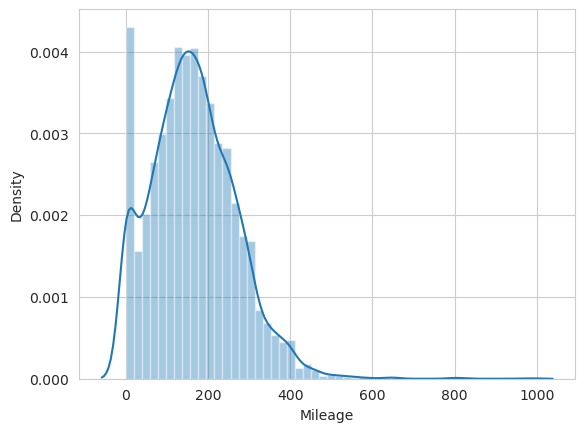

In [22]:
#Check Normality for Mileage
sea.distplot(data1['Mileage'])
plt.show()
#Normal but Outliers

In [24]:
#Remove outliers of Mileage
q=data1["Mileage"].quantile(0.99)
data2 = data1[data1['Mileage']<q]
data2.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/home/avanti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


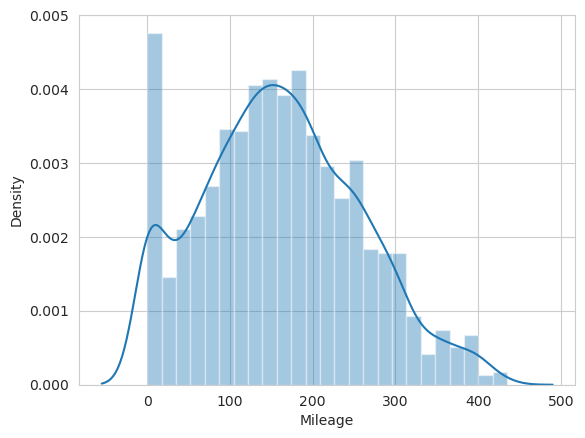

In [25]:
sea.distplot(data2['Mileage'])
plt.show()
#Normal

/home/avanti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


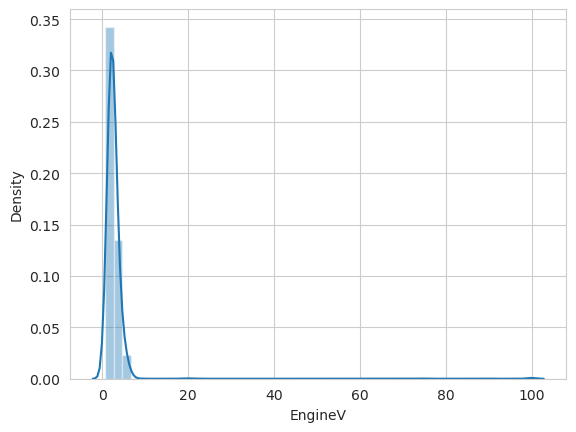

In [27]:
#Check Normality for EngineV
sea.distplot(data2['EngineV'])
plt.show()
#Normal but Outliers

/home/avanti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


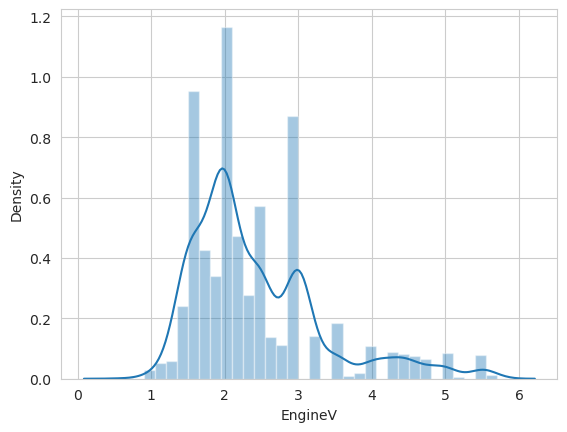

In [30]:
#Remove Outliers of EngineV
q=data2["EngineV"].quantile(0.99)
data3=data2[data2["EngineV"]<q]
#Plot data
sea.distplot(data3['EngineV'])
plt.show()
#Normalized

/home/avanti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


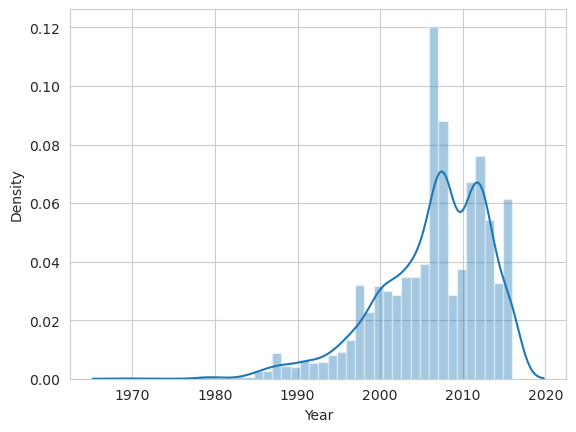

In [34]:
#Check Normality for Year
sea.distplot(data3['Year'])
plt.show()
#Normal but Outliers

/home/avanti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


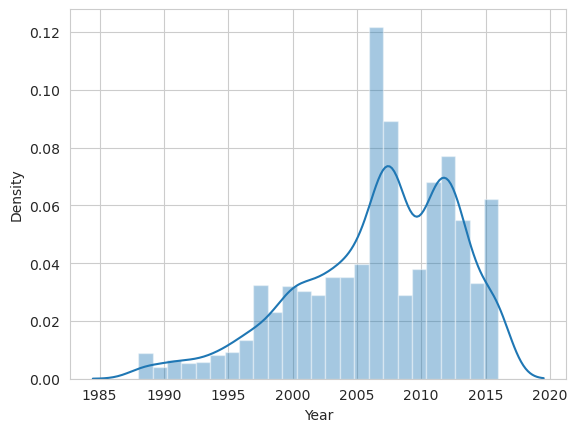

In [33]:
#Remove Outliers of Year
q=data3["Year"].quantile(0.01)
data4=data3[data3["Year"]>q]
#Plot data
sea.distplot(data4['Year'])
plt.show()
#Normalized

In [36]:
data4.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3840,3840.000000,3840,3840.000000,3840.000000,3840,3840,3840.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1451,NaN,NaN,1806,3478,NaN
mean,NaN,18028.973987,NaN,160.860156,2.424310,NaN,NaN,2006.702865
std,NaN,18963.887320,NaN,95.742943,0.899824,NaN,NaN,6.117627
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11525.000000,NaN,157.500000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


In [37]:
data4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [39]:
#Reset Index since we removed null rows
data_clean=data4.reset_index(drop=True)
data_clean

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3835,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3836,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3837,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3838,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


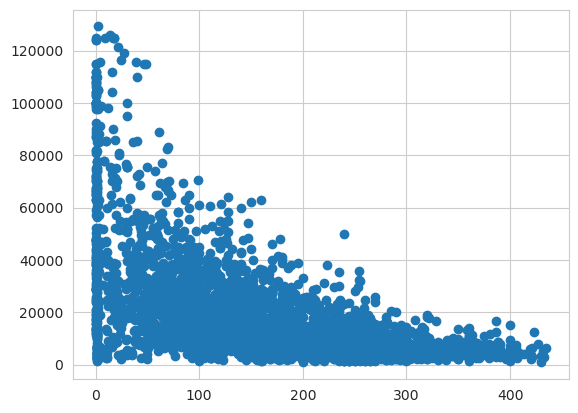

In [42]:
#Check Linearity for each numbered inde to dep var
plt.scatter(data_clean['Mileage'],data_clean['Price'])
plt.show()

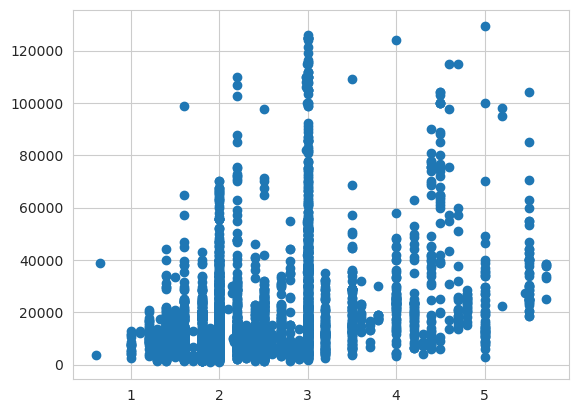

In [43]:
plt.scatter(data_clean['EngineV'],data_clean['Price'])
plt.show()

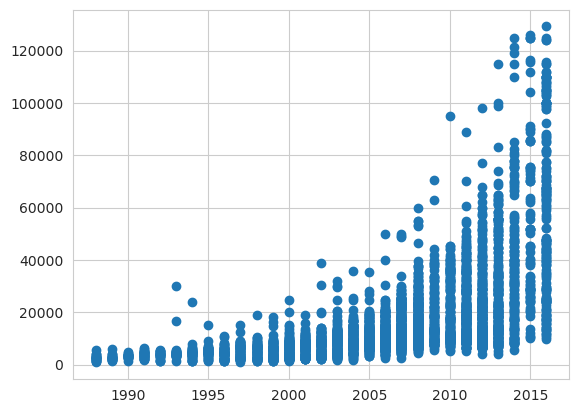

In [44]:
plt.scatter(data_clean['Year'],data_clean['Price'])
plt.show()

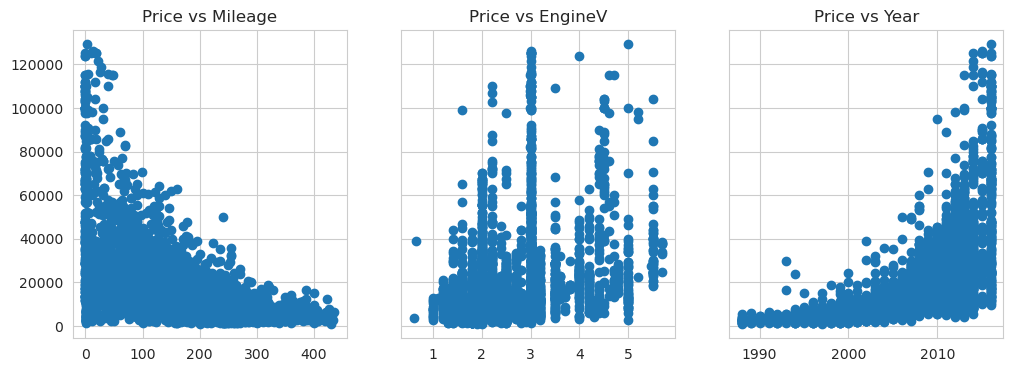

In [45]:
#Or 
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(12,4))
ax1.scatter(data_clean['Mileage'],data_clean['Price'])
ax1.set_title('Price vs Mileage')
ax2.scatter(data_clean['EngineV'],data_clean['Price'])
ax2.set_title('Price vs EngineV')
ax3.scatter(data_clean['Year'],data_clean['Price'])
ax3.set_title('Price vs Year')
plt.show()

/home/avanti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


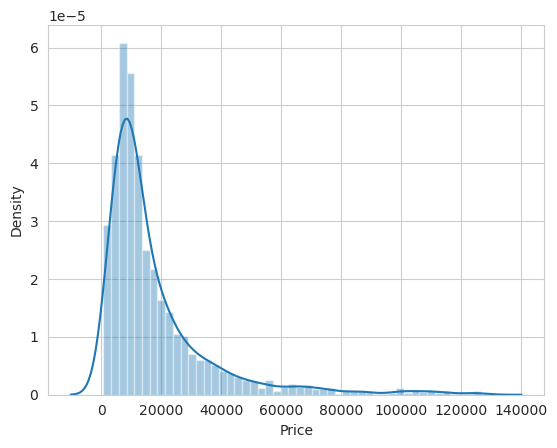

In [47]:
sea.distplot(data_clean['Price'])
plt.show()
#Exponential Data
#We will use log transformation for Exp data

In [49]:
log_price = np.log(data_clean['Price'])
log_price
#Log values of Price data

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
3835     9.350102
3836     9.792556
3837    11.736069
3838     8.779557
3839     9.510445
Name: Price, Length: 3840, dtype: float64

/home/avanti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


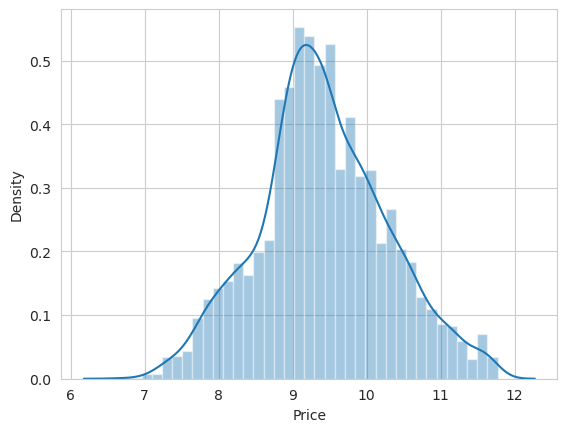

In [51]:
sea.distplot(log_price)
plt.show()
#Normalized data

In [52]:
np.exp(log_price)

0         4200.0
1         7900.0
2        13300.0
3        23000.0
4        18300.0
          ...   
3835     11500.0
3836     17900.0
3837    125000.0
3838      6500.0
3839     13500.0
Name: Price, Length: 3840, dtype: float64

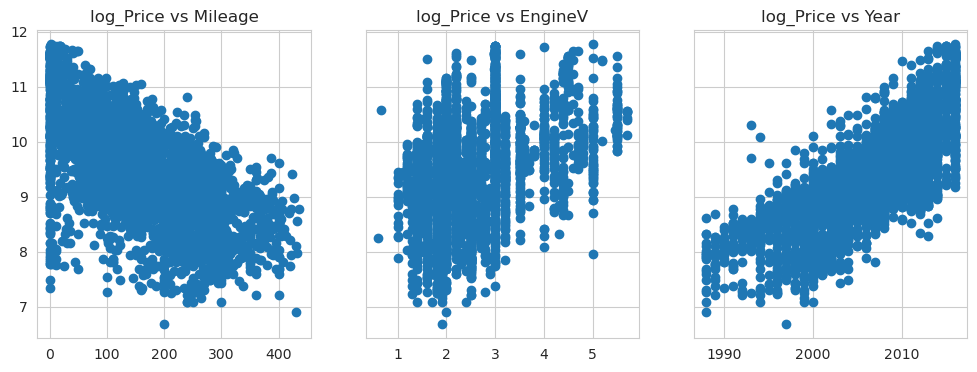

In [54]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(12,4))
ax1.scatter(data_clean['Mileage'],log_price)
ax1.set_title('log_Price vs Mileage')
ax2.scatter(data_clean['EngineV'],log_price)
ax2.set_title('log_Price vs EngineV')
ax3.scatter(data_clean['Year'],log_price)
ax3.set_title('log_Price vs Year')
plt.show()

In [56]:
data_clean['log_price'] = log_price
data_clean = data_clean.drop(['Price'],axis=1)
data_clean

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3835,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3836,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3837,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3838,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [60]:
# multicollinearity
test = data_clean[['Mileage','EngineV','Year']]
test.columns

Index(['Mileage', 'EngineV', 'Year'], dtype='object')

In [61]:
test.values

array([[2.770e+02, 2.000e+00, 1.991e+03],
       [4.270e+02, 2.900e+00, 1.999e+03],
       [3.580e+02, 5.000e+00, 2.003e+03],
       ...,
       [9.000e+00, 3.000e+00, 2.014e+03],
       [1.000e+00, 3.500e+00, 1.999e+03],
       [1.240e+02, 2.000e+00, 2.013e+03]])

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(test.values,i) for i in range(3)]
vif

[3.798257365247502, 8.262152900715565, 10.823028133032247]

In [64]:
#data is highly coorelated
data_with_no_multi = data_clean.drop(['Year'],axis=1)
#drop Year column
data_with_no_multi

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3835,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3836,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3837,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3838,BMW,sedan,1,3.5,Petrol,yes,8.779557


In [65]:
# dealing with categorical variables
data_with_dummies = pd.get_dummies(data_with_no_multi,drop_first=True)
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3836,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3837,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3838,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [66]:
X = data_with_dummies.drop(['log_price'],axis=1)
y = data_with_dummies['log_price']
X

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3836,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3837,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3838,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
StandardScaler()
X_scaled = scaler.transform(X)
X_scaled
#X_scaled.shape

array([[ 1.21319614, -0.47160927,  2.27456225, ..., -0.16183079,
         1.34425353,  0.32261867],
       [ 2.78009529,  0.52871702, -0.43964503, ..., -0.16183079,
        -0.74390729,  0.32261867],
       [ 2.05932168,  2.86281171, -0.43964503, ..., -0.16183079,
        -0.74390729,  0.32261867],
       ...,
       [-1.58633032,  0.63986439, -0.43964503, ..., -0.16183079,
        -0.74390729,  0.32261867],
       [-1.66989828,  1.19560122,  2.27456225, ..., -0.16183079,
         1.34425353,  0.32261867],
       [-0.38504098, -0.47160927, -0.43964503, ..., -0.16183079,
        -0.74390729,  0.32261867]])

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=0)
#X_train.shape
#X_test.shape
#y_train.shape
#y_test.shape
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
LinearRegression()
model.score(X_train,y_train)

0.7468546272694069

In [71]:
model.intercept_

9.407868574611731

In [72]:
model.coef_

array([-0.45433876,  0.21108766,  0.01729221,  0.00998738, -0.13310885,
       -0.18026513, -0.05383574, -0.08588115, -0.1465467 , -0.10110211,
       -0.19439361, -0.12304813, -0.15681516, -0.1229754 , -0.02802901,
       -0.14403424,  0.31944186])

In [75]:
#Test model
y_hat = model.predict(X_test)
#y_hat
#y_test
model.score(X_test,y_test)

0.7596542832087267

In [76]:
y_hat_inverse = np.exp(y_hat)
y_hat_inverse

array([10983.42373923, 17474.78693902,  2437.28057786, 20719.14865764,
        4570.10314389, 12938.26659975,  8118.94053206, 20739.54468216,
       19698.13669007,  3899.02890927, 45749.70791614, 10184.1410279 ,
       12054.53941872,  5662.12075067, 10425.84496035,  9410.98556419,
       30625.13908399,  4860.04319892,  3524.87855233, 13234.75566218,
        9548.35739487, 10939.87464798, 25903.4112137 ,  4118.56043738,
       17538.1216236 ,  4322.28322344, 12872.7800569 ,  7627.29155065,
       10342.99198005,  6009.23323772, 16132.16055496, 22380.37221268,
        6807.32540608, 16576.65507952, 17068.76978444, 40683.44546154,
       29923.15397662, 44136.2147914 , 13384.98488239, 19063.12284552,
       15866.91152945, 22233.20258427, 13822.60520094, 13992.77409673,
       10193.20199513, 18894.7033605 ,  6664.61016897,  5010.22853881,
       26967.3796463 , 10383.56339843,  5868.18125256,  4665.66477269,
       27164.06226371, 17278.02641249,  5047.17692399, 13925.31110395,
      